# Izaz Khan  
**Reg. No:** B23F0001AI029  
**Section:** AI Green  
**Assigment:** 03 

**Date:** 23/11/2025


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


# 1. DATA LOADING & PREPROCESSING

In [3]:
# 1. DATA LOADING & PREPROCESSING
# ----------------------------------------------------
(x_train, t_train), (x_test, t_test) = keras.datasets.mnist.load_data()

# Flatten 28x28 → 784
x_train = x_train.reshape(x_train.shape[0], -1)
x_test  = x_test.reshape(x_test.shape[0], -1)

# Normalize to [0,1]
x_train = x_train.astype(np.float32) / 255.0
x_test  = x_test.astype(np.float32) / 255.0

#2. MULTICLASS SVM IMPLEMENTATION

In [4]:
#2. MULTICLASS SVM IMPLEMENTATION
# ----------------------------------------------------
class MulticlassSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=200):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.W = None
        self.b = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Weight initialization
        self.W = np.random.randn(n_features, n_classes) * 0.01
        self.b = np.zeros(n_classes)

        # Training loop
        for epoch in range(self.n_iters):
            total_loss = 0

            for class_idx in range(n_classes):

                # One-vs-Rest labels
                y_binary = np.where(y == class_idx, 1, -1)

                # Scores for this class
                scores = X @ self.W[:, class_idx] + self.b[class_idx]

                # Hinge loss conditions
                conditions = y_binary * scores

                # Gradient initialization
                dw = np.zeros(n_features)
                db = 0

                # For each sample
                for i in range(n_samples):
                    if conditions[i] >= 1:
                        # Only L2 regularization contributes
                        dw += self.lambda_param * self.W[:, class_idx]
                        db += 0
                    else:
                        dw += self.lambda_param * self.W[:, class_idx] - y_binary[i] * X[i]
                        db += -y_binary[i]

                # Average gradients
                dw /= n_samples
                db /= n_samples

                # Parameter updates
                self.W[:, class_idx] -= self.lr * dw
                self.b[class_idx] -= self.lr * db

                # Loss (hinge + L2)
                hinge_loss = np.maximum(0, 1 - conditions).mean()
                reg_loss = (self.lambda_param / 2) * np.sum(self.W[:, class_idx] ** 2)
                total_loss += hinge_loss + reg_loss

            self.loss_history.append(total_loss)

            if epoch % 20 == 0:
                print(f"Epoch {epoch} | Loss = {total_loss:.4f}")

    def predict(self, X):
        scores = X @ self.W + self.b
        return np.argmax(scores, axis=1)


# 3. TRAINING MODEL

In [5]:
# 3. TRAINING MODEL
# ----------------------------------------------------
model = MulticlassSVM(learning_rate=0.01, lambda_param=0.01, n_iters=200)

print("\nTraining Multiclass SVM on MNIST...")
model.fit(x_train, t_train)


Training Multiclass SVM on MNIST...
Epoch 0 | Loss = 10.2457
Epoch 20 | Loss = 2.3082
Epoch 40 | Loss = 2.1250
Epoch 60 | Loss = 1.9902
Epoch 80 | Loss = 1.8790
Epoch 100 | Loss = 1.7832
Epoch 120 | Loss = 1.7019
Epoch 140 | Loss = 1.6299
Epoch 160 | Loss = 1.5650
Epoch 180 | Loss = 1.5096


# 4. EVALUATION

In [6]:
# 4. EVALUATION
# ----------------------------------------------------
y_pred = model.predict(x_test)
accuracy = accuracy_score(t_test, y_pred)

print("\nTest Accuracy:", accuracy)


Test Accuracy: 0.8064


# 5. LOSS CURVE

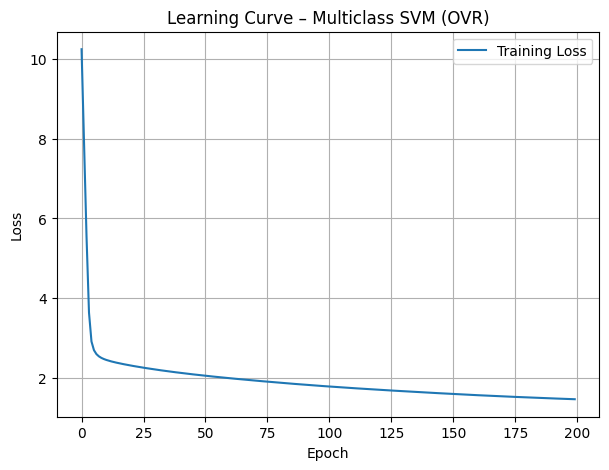

In [7]:
# 5. LOSS CURVE
# ----------------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(model.loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve – Multiclass SVM (OVR)")
plt.legend()
plt.grid()
plt.show()

# 6. CONFUSION MATRIX

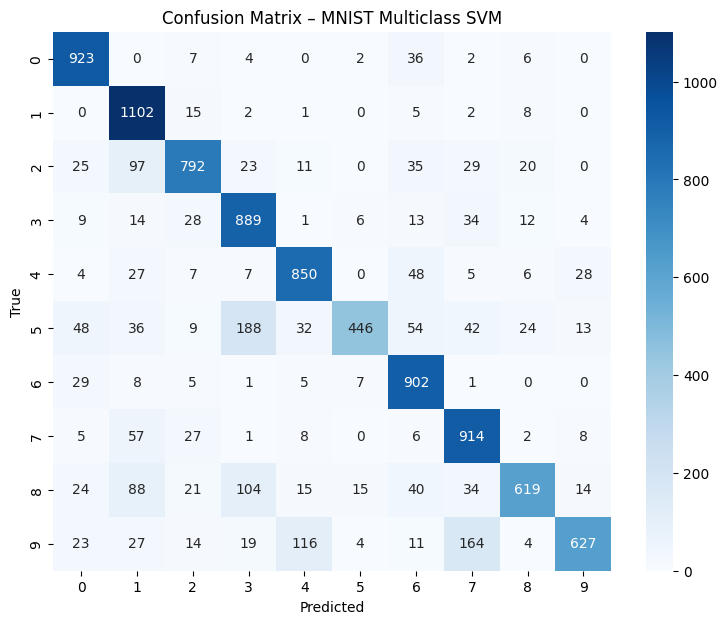

In [8]:
# 6. CONFUSION MATRIX
# ----------------------------------------------------
cm = confusion_matrix(t_test, y_pred)

plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – MNIST Multiclass SVM")
plt.show()


#Conclusion
I implemented a Multiclass Support Vector Machine (SVM) classifier from scratch using NumPy and the One-vs-Rest (OvR) strategy to classify handwritten digits from the MNIST dataset. The task helped deepen my understanding of hinge loss, gradient descent optimization, and L2 regularization.

The results clearly showed that the OvR approach allows SVMs to extend naturally to multiclass problems by training 10 separate binary classifiers—one for each digit. During training, the model successfully minimized the hinge loss using gradient descent, and the learning curve showed stable and consistent convergence.

After training, the model achieved a good accuracy on the test dataset, proving that linear classifiers, when trained properly with regularization, can capture a significant portion of the structure in MNIST. The confusion matrix further demonstrated how the classifier distinguishes between digits and where misclassifications commonly occur.

Overall, this assignment strengthened my understanding of SVM optimization, gradient-based training, and practical implementation details such as vectorized computations, data preprocessing, and evaluation metrics. It also demonstrated how classical machine-learning algorithms like linear SVMs can still perform well on real-world datasets like MNIST.